In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the final cleaned file output1.1
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,Region,StockCode,Description,Quantity,UnitPrice(£),TotalAmount(£)
0,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,71053,WHITE METAL LANTERN,6,3.39,20.34
2,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [264]:
#Map showing distribiution of customer by country - status working 
import folium
import pandas as pd
from geopy.geocoders import Nominatim

# Read the data from the Excel file
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# Define the color scheme
colors = {
    0: 'blue',
    1: 'green',
    2: 'orange',
    3: 'red'
}

# Group the data by country and calculate the total number of customers
grouped_data = df.groupby('Country')['CustomerID'].nunique().reset_index()
grouped_data.columns = ['Country', 'CustomerCount']

# Define the customer count groups
bins = [0, 50, 100, 150, float('inf')]
labels = [0, 1, 2, 3]
grouped_data['Group'] = pd.cut(grouped_data['CustomerCount'], bins=bins, labels=labels, include_lowest=True)

# Initialize the map at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)  # Centered map at (0, 0) with zoom level 2

# Add a title to the map
title_html = '<h3 align="center" style="font-size:20px"><b>Customer Distribution by Country</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))


# Add markers for each country
for index, row in grouped_data.iterrows():
    geolocator = Nominatim(user_agent="my_map")
    location = geolocator.geocode(row['Country'], timeout=20)  # Geocode the country name to get its coordinates
    if location:
        popup_info = f"Country: {row['Country']}, Customers: {row['CustomerCount']}"
        color = colors[row['Group']]
        folium.Marker((location.latitude, location.longitude), popup=popup_info, icon=folium.Icon(color=color)).add_to(m)

# Add legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 1000px; height: 40px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp; <b>Legend</b> &nbsp; 
     &nbsp; 0-50 Customers &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i> &nbsp; 
     &nbsp; 51-100 Customers &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i> &nbsp; 
     &nbsp; 151+ Customers &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i> &nbsp; 
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m




In [267]:
import folium
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# Group the data by country and calculate the total spend
grouped_data = df.groupby('Country')['TotalAmount(£)'].sum().reset_index()
grouped_data.columns = ['Country', 'TotalSpend']

# Initialize the map at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)  # Centered map at (0, 0) with zoom level 2

# Create a list of tuples containing latitude, longitude, and total spend for each country
heat_data = []
for index, row in grouped_data.iterrows():
    geolocator = Nominatim(user_agent="my_map")
    location = geolocator.geocode(row['Country'], timeout=20)  # Geocode the country name to get its coordinates
    if location:
        heat_data.append((location.latitude, location.longitude, row['TotalSpend']))

# Add HeatMap layer to the map
folium.plugins.HeatMap(heat_data).add_to(m)

# Add a title to the map
title_html = '<h3 align="center" style="font-size:20px"><b>Total AMount Spend by Country</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Display the map
m


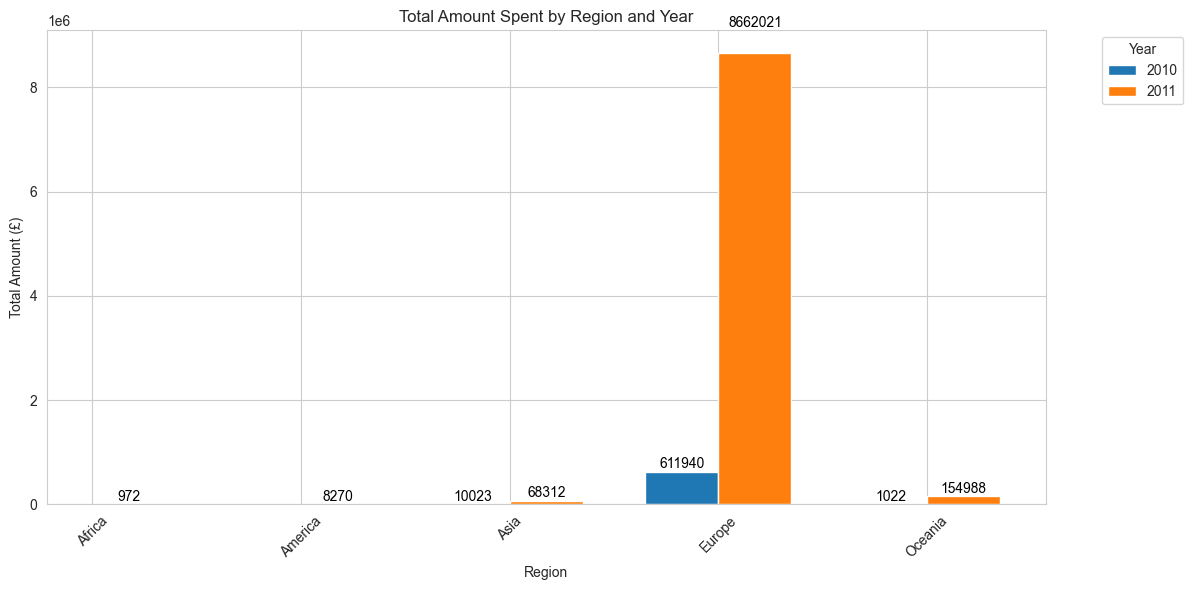

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year from 'InvoiceDate'
df['Year'] = df['InvoiceDate'].dt.year

# Group by region and year and sum the total amount spent
total_amount_by_region_year = df.groupby(['Region', 'Year'])['TotalAmount(£)'].sum().unstack()

# unique years present in the data
years = total_amount_by_region_year.columns

# Plotting the bar chart 
plt.figure(figsize=(12, 6))
width = 0.35  # Width of the bars
x = range(len(total_amount_by_region_year.index))  # x locations for the groups

# Plotting bars for each year
for i, year in enumerate(years):
    # Plotting bars
    plt.bar([pos + i*width for pos in x], total_amount_by_region_year[year], width, label=str(year))
    
    # total amount spent on top of each bar
    for pos, val in zip([pos + i*width for pos in x], total_amount_by_region_year[year]):
        if np.isfinite(pos) and np.isfinite(val):  # Check if pos and val are finite
            plt.text(pos, val + 0.05*val, f'{val:.0f}', ha='center', va='bottom', color='black')

#  labels, title, and legend
plt.xlabel('Region')
plt.ylabel('Total Amount (£)')
plt.title('Total Amount Spent by Region and Year')
plt.xticks([pos + width*(len(years)-1)/2 for pos in x], total_amount_by_region_year.index, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [19]:
#Segment customers into clusters

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read the data
data = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate snap date
snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calcaulate RFM values
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Calculate Recency
    'InvoiceNo': 'nunique',  # Calculate Frequency
    'TotalAmount(£)': 'sum'  # Calculate Monetary Value
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount(£)': 'Monetary'
})

# Assign RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=False) + 1
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=4, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=False) + 1

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['R_Score', 'F_Score', 'M_Score']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(cluster_summary)
#Note on customer clusters
 #Cluster 0 = low frequency / low monetary value - few purchase and spend less than other cluster - occasional buyer no engagement
 #Cluster 1 = moderate frequency / moderate spend - regualr customer contibuting to business revenue
 #Cluster 2 = moderate frequency / high spend - strategic target for upselling
 #Clsuter 3 = High frequency / high monetary - loyal and valuable customers
 

   Cluster     Recency  Frequency     Monetary
0        0   40.894262   3.343443  1502.755148
1        1  176.601490   1.225326   184.453194
2        2  165.550170   1.752551   941.630010
3        3   32.562791  12.718605  7417.123721


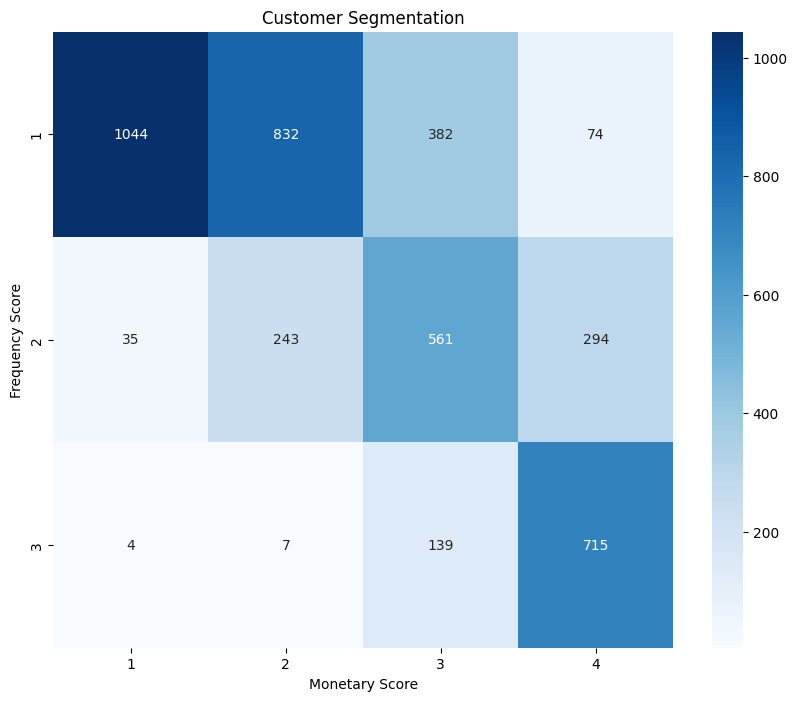

In [32]:
#visual display of customer count by cluster score distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each cluster
cluster_counts = rfm.groupby(['F_Score', 'M_Score']).size().unstack(fill_value=0)

# Create a matrix-style heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_counts, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Monetary Score')
plt.ylabel('Frequency Score')
plt.title('Customer Segmentation')
plt.show()


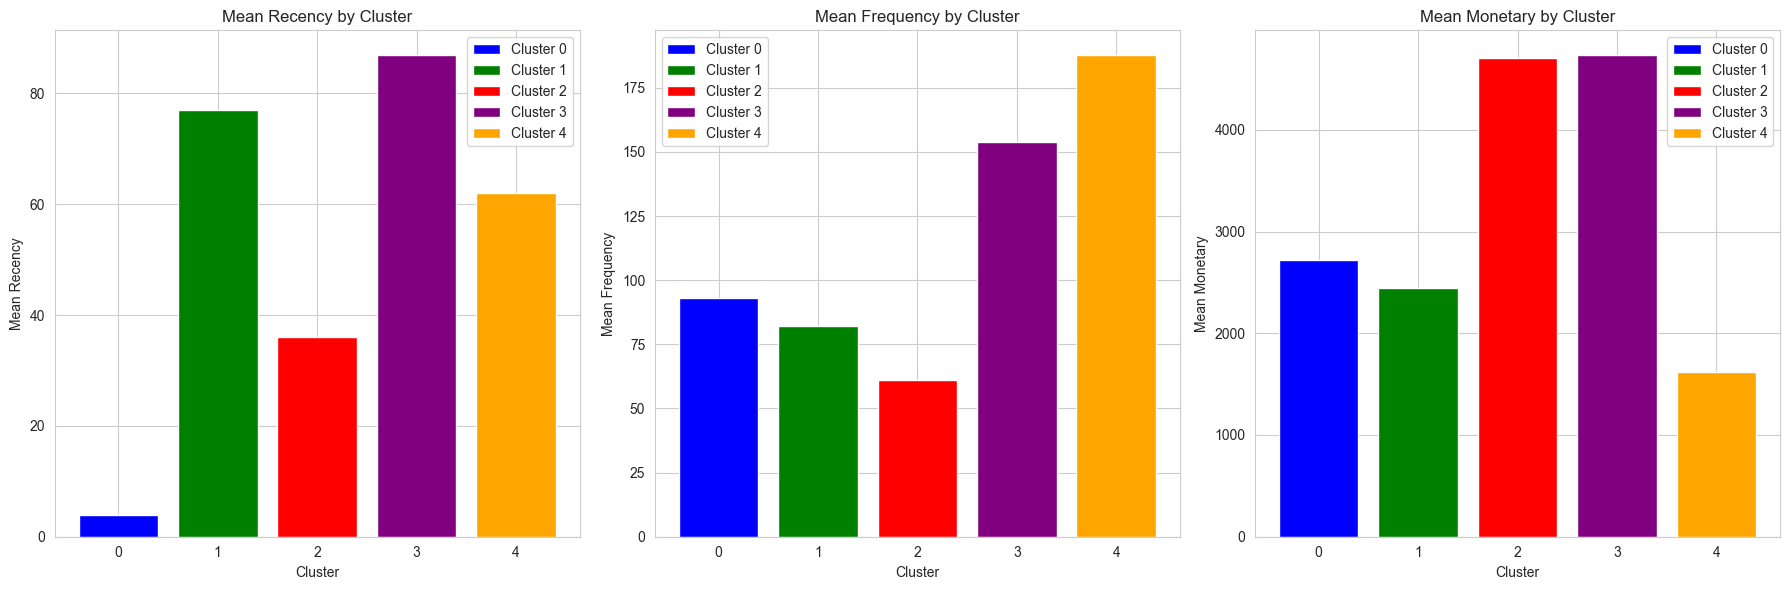

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame
cluster_means = pd.DataFrame({
    'Recency': np.random.randint(1, 100, 5),
    'Frequency': np.random.randint(50, 200, 5),
    'Monetary': np.random.randint(1000, 5000, 5)
}, index=np.arange(5))

# Define a list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(18, 6))  

for i, col in enumerate(cluster_means.columns):  # Iterate over columns ('Recency', 'Frequency', 'Monetary')
    plt.subplot(1, 3, i+1)  # Select the subplot
    for j, cluster in enumerate(cluster_means.index):  # Iterate over clusters
        plt.bar(cluster, cluster_means.loc[cluster, col], color=colors[j], label=f'Cluster {cluster}')  # Plot each bar color
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {col}')
    plt.title(f'Mean {col} by Cluster')
    plt.legend()  # Show legend for the clusters

plt.tight_layout()
plt.show()



In [190]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read the data
data = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# Convert 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate the snapshot date
snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calculate RFM values
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Calculate Recency
    'InvoiceNo': 'nunique',  # Calculate Frequency
    'TotalAmount(£)': 'sum',  # Calculate Monetary Value
    'Region': 'first'  # Keep the first Region value for each customer
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount(£)': 'Monetary'
})

# Assign RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=False) + 1
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=4, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=False) + 1

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['R_Score', 'F_Score', 'M_Score']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
cluster_summary = rfm.groupby(['Region', 'Cluster']).size().reset_index(name='Number of Customers')

print(cluster_summary)




     Region  Cluster  Number of Customers
0    Africa        0                    1
1   America        0                    3
2   America        1                    3
3   America        2                    3
4      Asia        0                    7
5      Asia        1                    6
6      Asia        2                   11
7      Asia        3                    1
8    Europe        0                 1208
9    Europe        1                 1064
10   Europe        2                 1158
11   Europe        3                  856
12  Oceania        0                    1
13  Oceania        1                    1
14  Oceania        2                    4
15  Oceania        3                    3


In [191]:
import folium
from geopy.geocoders import Nominatim

# Initialize the map at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)  # Centered map at (0, 0) with zoom level 2

# Create a dictionary to map cluster numbers to colors
colors = {
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'purple'
}

# Create a dictionary to map regions to their respective offsets
region_offsets = {
    'Oceania': (-5, -50),  # Adjusted offset for Oceania to remain near Australia
    'Africa': (-20, 0),  # Original offset for Africa
    'America': (0, 0),  # Original offset for America
    'Asia': (0, 0),  # Original offset for Asia
    'Europe': (0, 0)  # Original offset for Europe
}

# Create a layer for each cluster
for cluster in range(4):
    cluster_data = cluster_summary[cluster_summary['Cluster'] == cluster]
    cluster_layer = folium.FeatureGroup(name=f'Cluster {cluster}')
    
    # Add markers for each region in the cluster
    for _, row in cluster_data.iterrows():
        geolocator = Nominatim(user_agent="my_map")
        location = geolocator.geocode(row['Region'], timeout=20)  # Geocode the region name to get its coordinates
        if location:
            lat_offset, lon_offset = region_offsets.get(row['Region'], (0, 0))
            location = (location.latitude + lat_offset, location.longitude + lon_offset)
            popup_info = f"Cluster: {cluster}, Customers: {row['Number of Customers']}, Region: {row['Region']}"
            folium.Marker(location, popup=popup_info, icon=folium.Icon(color=colors[cluster])).add_to(cluster_layer)
    
    # Add the cluster layer to the map
    cluster_layer.add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Add a title to the map
title_html = '<h3 align="center" style="font-size:20px"><b>Customer Cluster By Region</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add a legend to the map
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 450px; height: 40px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp; <b>Legend</b> &nbsp; 
     Cluster 0 &nbsp; <i class="fa fa-circle" style="color:blue"></i> &nbsp; 
     Cluster 1 &nbsp; <i class="fa fa-circle" style="color:green"></i> &nbsp; 
     Cluster 2 &nbsp; <i class="fa fa-circle" style="color:red"></i> &nbsp; 
     Cluster 3 &nbsp; <i class="fa fa-circle" style="color:purple"></i>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m


In [193]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read the data
data = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# Convert 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate the snapshot date
snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calculate RFM values
rfm_clusterbycountry = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Calculate Recency
    'InvoiceNo': 'nunique',  # Calculate Frequency
    'TotalAmount(£)': 'sum',  # Calculate Monetary Value
    'Country': 'first'  # Keep the first Country value for each customer
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount(£)': 'Monetary'
})

# Assign RFM scores
rfm_clusterbycountry['R_Score'] = pd.qcut(rfm_clusterbycountry['Recency'], q=4, labels=False) + 1
rfm_clusterbycountry['F_Score'] = pd.qcut(rfm_clusterbycountry['Frequency'], q=4, labels=False, duplicates='drop') + 1
rfm_clusterbycountry['M_Score'] = pd.qcut(rfm_clusterbycountry['Monetary'], q=4, labels=False) + 1

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clusterbycountry[['R_Score', 'F_Score', 'M_Score']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
rfm_clusterbycountry['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Filter to keep only the top 5 countries per cluster
top_countries = rfm_clusterbycountry.groupby('Cluster')['Country'].value_counts().groupby(level=0).head(5).reset_index(name='Number of Customers')
rfm_clusterbycountry = rfm_clusterbycountry.merge(top_countries, on=['Cluster', 'Country'], how='inner')

# Analyze clusters
cluster_summary = rfm_clusterbycountry.groupby(['Cluster', 'Country']).size().reset_index(name='Number of Customers')

print(cluster_summary)


    Cluster         Country  Number of Customers
0         0         Belgium                   10
1         0          France                   22
2         0         Germany                   34
3         0           Spain                   10
4         0  United Kingdom                 1085
5         1          France                   17
6         1         Germany                   14
7         1           Italy                    4
8         1           Spain                    7
9         1  United Kingdom                 1003
10        2          France                   26
11        2         Germany                   24
12        2           Spain                    9
13        2     Switzerland                   10
14        2  United Kingdom                 1044
15        3       Australia                    3
16        3         Belgium                    5
17        3          France                   22
18        3         Germany                   22
19        3  United 

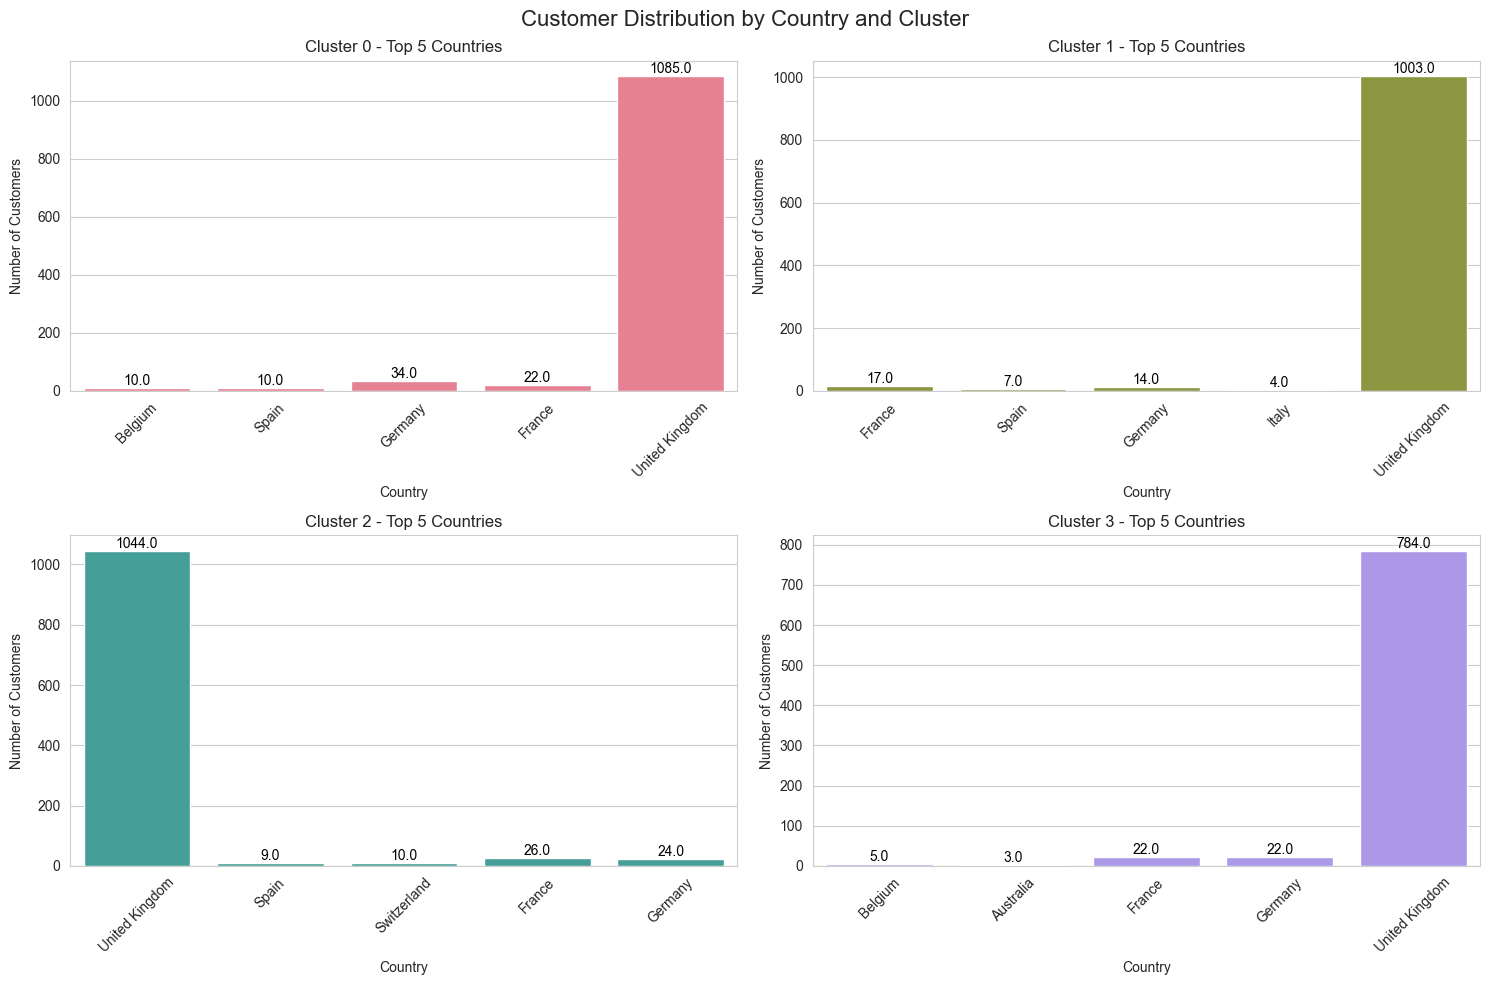

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Define a custom color palette 
custom_palette = sns.color_palette("husl", n_colors=len(rfm_clusterbycountry['Cluster'].unique()))

# make 4 subplots (one for each cluster)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over each cluster and create a bar chart
for i, (cluster, data) in enumerate(rfm_clusterbycountry.groupby('Cluster')):
    ax = axs[i // 2, i % 2]  # Get the subplot for the current cluster
    sns.countplot(data=data, x='Country', color=custom_palette[i], ax=ax)
    ax.set_title(f'Cluster {cluster} - Top 5 Countries')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

    # Annotate each bar with the number of customers
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Add a title 
plt.suptitle('Customer Distribution by Country and Cluster', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\sivabrian.mooken\AppData\Local\Temp\ipykernel_23296\3867817410.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Quantity'))
C:\Users\sivabrian.mooken\AppData\Local\Temp\ipykernel_23296\3867817410.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, 'Quantity'))


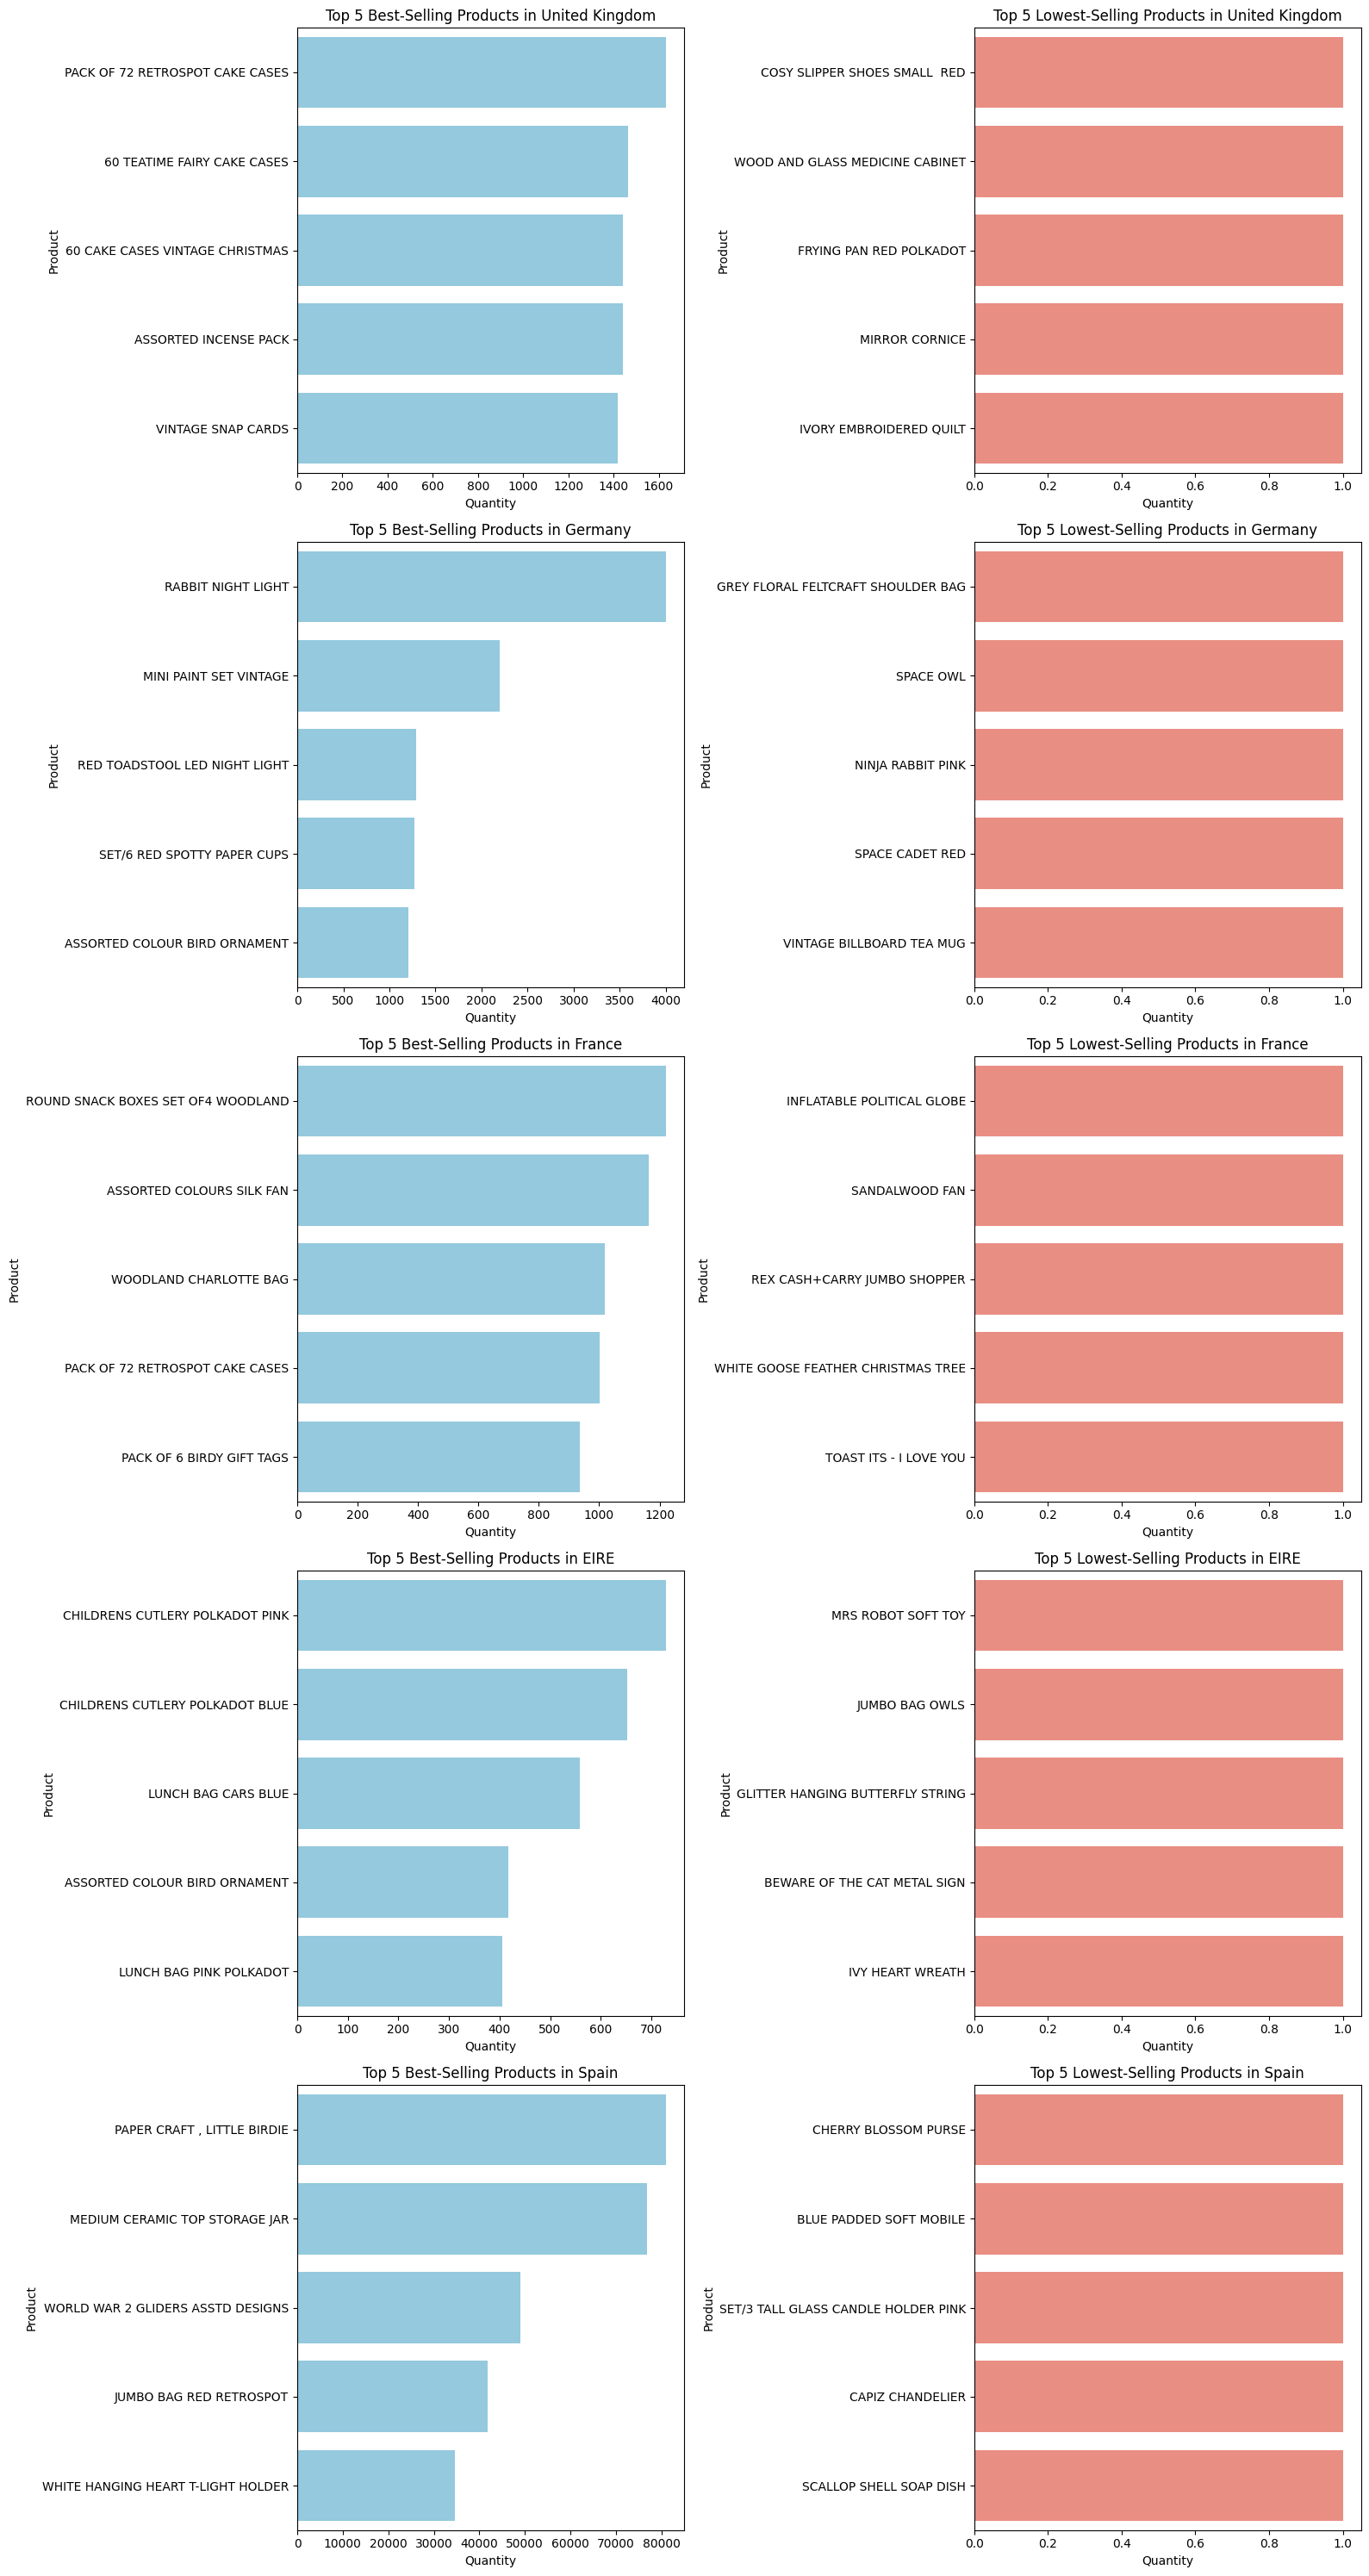

In [8]:
# top 5 best-selling and lowest-selling products in each of the top 5 countries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# Get the top 5 countries with the highest customer numbers
top_countries = df['Country'].value_counts().nlargest(5).index

# Calculate total quantity sold for each product in each country
product_sales = df.groupby(['StockCode', 'Description', 'Country'])['Quantity'].sum().reset_index()

# Get top 5 best-selling and top 5 lowest-selling products in each of the top 5 countries
top_selling_products = (
    product_sales[product_sales['Country'].isin(top_countries)]
    .groupby('Country', as_index=False)
    .apply(lambda x: x.nlargest(5, 'Quantity'))
    .reset_index(drop=True)
)

bottom_selling_products = (
    product_sales[product_sales['Country'].isin(top_countries)]
    .groupby('Country', as_index=False)
    .apply(lambda x: x.nsmallest(5, 'Quantity'))
    .reset_index(drop=True)
)

# Plotting
fig, axes = plt.subplots(len(top_countries), 2, figsize=(16, 6 * len(top_countries)))

for i, (country, top_selling, bottom_selling) in enumerate(
    zip(top_countries, top_selling_products.groupby('Country'), bottom_selling_products.groupby('Country'))
):
    ax = axes[i, 0]
    sns.barplot(x='Quantity', y='Description', data=top_selling[1], ax=ax, color='skyblue')
    ax.set_title(f'Top 5 Best-Selling Products in {country}')
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Product')

    ax = axes[i, 1]
    sns.barplot(x='Quantity', y='Description', data=bottom_selling[1], ax=ax, color='salmon')
    ax.set_title(f'Top 5 Lowest-Selling Products in {country}')
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Product')

plt.tight_layout()
plt.show()




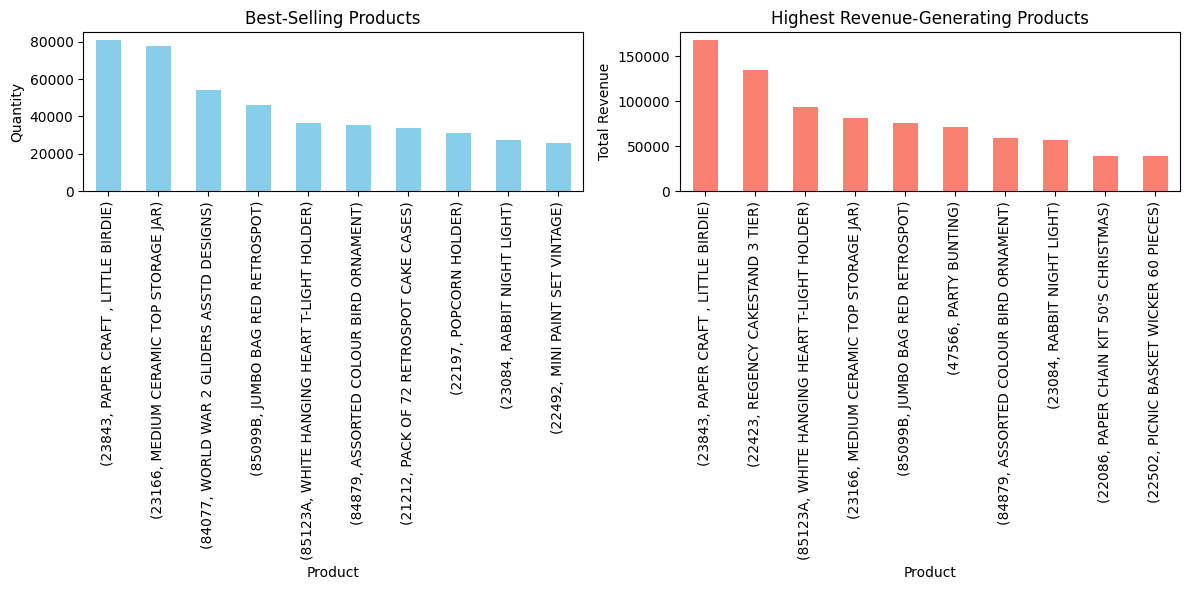

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# Best-Selling Products
best_selling_products = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)

# Highest Revenue-Generating Products
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice(£)']
highest_revenue_generating_products = df.groupby(['StockCode', 'Description'])['TotalRevenue'].sum().sort_values(ascending=False).head(10)

# Filter out products with high returns
returns = df[df['Quantity'] < 0]
returns['RefundedAmount'] = returns['Quantity'] * returns['UnitPrice(£)']
high_return_products = returns.groupby(['StockCode', 'Description'])['RefundedAmount'].sum() / df.groupby(['StockCode', 'Description'])['TotalRevenue'].sum()
high_return_products = high_return_products.dropna().sort_values(ascending=False).index
df = df[~df[['StockCode', 'Description']].apply(tuple, 1).isin(high_return_products)]

# Plotting
plt.figure(figsize=(12, 6))

# Best-Selling Products
plt.subplot(1, 2, 1)
best_selling_products.plot(kind='bar', color='skyblue')
plt.title('Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity')

# Highest Revenue-Generating Products
plt.subplot(1, 2, 2)
highest_revenue_generating_products.plot(kind='bar', color='salmon')
plt.title('Highest Revenue-Generating Products')
plt.xlabel('Product')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


